In [4]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 18s 2us/step


6


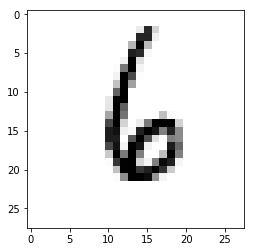

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 3994 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 6
plt.imshow(x_train[image_index], cmap='Greys')

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [13]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


In [14]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.2027 - acc: 0.9398
Epoch 2/10
60000/60000 [==============================] - 30s 505us/step - loss: 0.0837 - acc: 0.9740
Epoch 3/10
60000/60000 [==============================] - 29s 489us/step - loss: 0.0584 - acc: 0.9816
Epoch 4/10
60000/60000 [==============================] - 30s 495us/step - loss: 0.0443 - acc: 0.9856
Epoch 5/10
60000/60000 [==============================] - 31s 510us/step - loss: 0.0345 - acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 30s 499us/step - loss: 0.0315 - acc: 0.9894
Epoch 7/10
60000/60000 [==============================] - 29s 485us/step - loss: 0.0261 - acc: 0.9911
Epoch 8/10
60000/60000 [==============================] - 29s 485us/step - loss: 0.0233 - acc: 0.9919
Epoch 9/10
60000/60000 [==============================] - 29s 484us/step - loss: 0.0195 - acc: 0.9937
Epoch 10/10
60000/60000 [==============================] - 30s 497us/step - loss: 

In [ ]:
model.evaluate(x_test, y_test)